# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

Ans: 已完成，见Lesson04-Recode.ipynb

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

Ans:
>在神经网络中，一个神经元计算的是一个线性函数$z=W^Tx+b$，然后紧跟一个激活函数，常用激活函数有Sigmoid, ReLu, Leaky ReLu和tanh

####  2. Why we use non-linear activation funcitons in neural networks?

Ans:
>这个问题不同角度去回答：
1. 如果隐藏层使用线性函数，那么多个线性函数的叠加一定可以由一个线性函数来表示，这样的话隐藏层的深度就没有意义了。而且，我们希望描述输入X与输出y的复杂关系，但是用线性函数作为激活函数无法让神经网络去逼近复杂函数
2. 很多时候神经元的输出会很大，然后再往下传递会对系统的算力有比较大的需求；另外我们在处理特定问题的时候希望把输出控制在某一范围内，比如说概率问题，我们就可以用sigmoid可以把输出映射在(0,1)。简单的说就是激活函数有时需要将神经元输出压缩到某一有界区间内，这时用线性函数是无法做到的。

#### 3. What is the 'Logistic Loss' ?

Ans:
> Logistic Loss是Logistic Regression的损失函数
$$ L= -ylog\hat{y} - (1-y)log(1-\hat{y}) $$

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

Ans:
>C. Sigmoid ($Sigmoid(i)=\frac{1}{1+e^{-z}}$)可以把输出映射到(0, 1)，满足题中图像识别(是不是包含猫，二分类问题)的需求

#### 5. Why we don't use zero initialization for all parameters ?

Ans:
>如果所有参数都初始化为0，那么会导致对称性问题，也就是所有的节点都一样。当所有节点初始状态都为0，都一样，那么在接受相同的输入X时，输出的y也一样，迭代更新时参数的变化也一样，用神经网络来训练就没有意义了。所以一般的做法是w初始化为比较小的值，b可以初始化为0

#### 6. Can you implement the softmax function using python ? 

$$ S_i=\frac{e^{V_i}}{\sum^{C}_{i}e^{V_i}} $$

In [1]:
import numpy as np
def softmax(x:np.array):
    x -= np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [2]:
test = np.array([4.0, 6.0, 5.0, 2.0, 7.0])
softmax(test)

array([0.03192011, 0.2358595 , 0.08676786, 0.00431992, 0.6411326 ])

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [4]:
# Loading the data 
digits = datasets.load_digits()

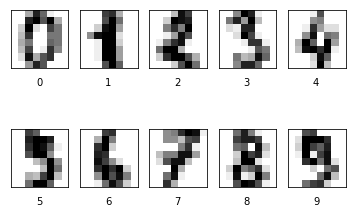

In [5]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [7]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](network.png)

In [9]:
!pwd

/Users/renshawjiang/PycharmProjects/kkb_nlp/lecture4


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [58]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1 / (1 + np.exp(-z))
    
    return s

In [59]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [94]:
# Random innitialize the parameters


def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.rand(dim, 1) * 1e-2
    b = 1e-2
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)})$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [68]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[0]
    A = sigmoid(np.dot(X, w) + b)
    A = A.reshape(1, -1)
    Y = Y.reshape(1, -1)
    
    cost = -1/m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    dw = 1/m * np.dot((A-Y), X).T
    db = 1/m * np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [14]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [15]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[1],1)
    
    A = sigmoid(np.dot(X, w) + b)
    
    A[A > 0.5] = 1
    A[A <= 0.5] = 0
    
    Y_prediction = A.reshape(1, -1)
    
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [16]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    # Initial parms
    dim = X_train.shape[1]
    w, b = initialize_parameters(dim)
    
    # Training
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w, b = params['w'], params['b']
    
    # Accuracy
    def acc(y, y_predict):
        diff = y - y_predict
        correct = diff[diff == 0] # if same, the difference equals 0
        return correct.shape[0] / y.shape[0]
    train_predict = predict(w, b, X_train)
    test_predict = predict(w, b, X_test)
    training_accuracy = acc(Y_train, train_predict)
    test_accuracy = acc(Y_test, test_predict)
    
    result = {
        'w': w,
        'b': b,
        'training_accuracy': training_accuracy,
        'test_accuracy': test_accuracy,
        'cost': costs
    }
    
    return result
        

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

In [98]:
# test on data
result = model(X_train, y_train, X_test, y_test, 5000, 1e-2, True)

Cost after iteration 0: 0.993762
Cost after iteration 100: 0.352997
Cost after iteration 200: 0.328619
Cost after iteration 300: 0.276490
Cost after iteration 400: 0.285825
Cost after iteration 500: 0.302989
Cost after iteration 600: 0.262833
Cost after iteration 700: 0.259752
Cost after iteration 800: 0.275396
Cost after iteration 900: 0.264910
Cost after iteration 1000: 0.261794
Cost after iteration 1100: 0.267046
Cost after iteration 1200: 0.262586
Cost after iteration 1300: 0.262886
Cost after iteration 1400: 0.263253
Cost after iteration 1500: 0.261804
Cost after iteration 1600: 0.262273
Cost after iteration 1700: 0.261582
Cost after iteration 1800: 0.261423
Cost after iteration 1900: 0.261233
Cost after iteration 2000: 0.260924
Cost after iteration 2100: 0.260808
Cost after iteration 2200: 0.260567
Cost after iteration 2300: 0.260427
Cost after iteration 2400: 0.260253
Cost after iteration 2500: 0.260105
Cost after iteration 2600: 0.259964
Cost after iteration 2700: 0.259827
Cost

In [99]:
result

{'w': array([[ 0.00787827],
        [-0.01181231],
        [ 0.05709668],
        [-0.06240109],
        [ 0.0784013 ],
        [ 0.09855221],
        [ 0.19870259],
        [-0.11377913],
        [ 0.12455956],
        [-0.16466806],
        [ 0.1056311 ],
        [ 0.07863837],
        [-0.05918309],
        [-0.04092658],
        [-0.0557852 ],
        [ 0.18634581],
        [-0.02929343],
        [ 0.06025461],
        [ 0.14607656],
        [-0.03044287],
        [-0.25826436],
        [-0.0548388 ],
        [-0.11038257],
        [-0.20553043],
        [-0.0328296 ],
        [-0.23150812],
        [ 0.05420515],
        [ 0.16743641],
        [ 0.06569767],
        [ 0.17538294],
        [-0.15762595],
        [-0.03900698],
        [ 0.00070102],
        [-0.22914379],
        [-0.01419121],
        [ 0.21132342],
        [-0.09865932],
        [-0.04331597],
        [ 0.04407415],
        [ 0.00834743],
        [ 0.00234509],
        [-0.01057082],
        [ 0.04060357],
      

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

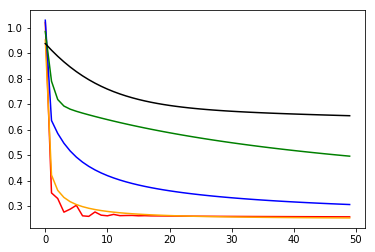

In [103]:
lrs = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
colors = ['red', 'orange', 'blue', 'green', 'black']
for lr, c in zip(lrs, colors):
    cost = model(X_train, y_train, X_test, y_test, 5000, lr, False)['cost']
    plt.plot(range(len(cost)), cost, color=c)

Comments
> from the graph we know learning-rate 1e-3 is the best. <br>
1e-2 is too large so that the line is not smooth<br>
others are too small

##### 4.2 Observe the effect of iteration_num on the test accuracy.

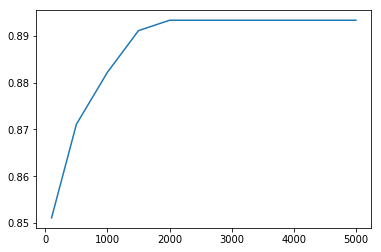

In [111]:
iteration_nums = [100, 500, 1000, 1500, 2000, 3000, 5000]
test_acc = []
for iteration_num in iteration_nums:
    test_acc.append(model(X_train, y_train, X_test, y_test, iteration_num, 1e-3, False)['test_accuracy'])
plt.plot(iteration_nums, test_acc);

Comments:
> The accuracy increase rapidly with iterations_num when iterations_num is less than 1500, then converge

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digits (0,1,2,3,4,5,6,7,8,9) is in the image.

> 1. 用softmax代替sigmoid为激活函数
2. 把y = i 转化为 y[i] = 1, 其他为0 (如y=2 -> y=[0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
3. w.shape = [dim of X, 10]
4. 导数计算:
    - softmax
$$
\frac{\partial{S_i}}{\partial{a_j}}= \frac{\partial{\frac{e^{a_i}}{\sum_{j} e^{a_i}}}}{\partial{a_j}}
= \frac{\frac{\partial{e^{a_i}}}{\partial{e^{a_j}}}}{\sum}-\frac{e^{a_i}\frac{\partial{\sum}}{\partial{a_j}}}{(\sum)^2} = \frac{\frac{\partial{e^{a_i}}}{\partial{e^{a_j}}}\sum -e^{a_i}e^{a_j}}{(\sum)^2} =
\begin{cases}
\frac{e^{a_i}\sum - e^{a_i}e^{a_j}}{(\sum)^2}, & i = j \\
-\frac{e^{a_i}e^{e_j}}{(\sum)^2}, & i \ne j
\end{cases} = 
\begin{cases}
S_i(1-S_j), & i = j \\
-S_iS_j, & i \ne j
\end{cases}
$$
    - cost function
$$ L = - \frac{1}{m}\sum y_ilogS_i $$
$$ \frac{\partial{L}}{\partial{S_i}}=-\frac{1}{m} \frac{y_i}{S_i} $$
    - 根据链式法则
$$
\begin{align}
\frac{\partial{L}}{\partial{a_i}} & = \sum_{j}\frac{\partial{L}}{\partial{S_j}}\frac{\partial{S_j}}{\partial{a_i}} \\
& = -\frac{1}{m}(\frac{y_i}{S_i}S_i(1-S_i)-\sum_{j \ne i}\frac{y_j}{S_j}S_iS_j) \\
& = -\frac{1}{m}(y_i - y_iS_i - \sum_{j \ne i}y_jS_i) \\
& = -\frac{1}{m}(y_i - S_i\sum_jy_j) \\
& = -\frac{1}{m}(y_i - S_i)
\end{align}
$$

In [249]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [124]:
def transfer(y):
    after = []
    for e in y:
        new = [0] * 10
        new[e] = 1
        after.append(new)
    return np.array(after)

In [250]:
y_train_ = transfer(y_train)
y_test_ = transfer(y_test)

In [303]:
from sklearn.utils import resample
def digits_recognization(X_train, y_train, X_test, y_test, num_iterations, learning_rate, print_cost=True):
    """
    Params:
        X_train, y_train, X_test, y_test: training data and test data
        num_iterations: number of iterations
        learning_rate: the step of parameters change in every iteration
        print_cost: True of False
        
    Returns:
        result: A dict of training result
        predict_model: A function that accept a digit graph and return the predict number based on this algorithm
    """
    
    def softmax_func(x: np.array):
        x -= np.max(x)
        return np.exp(x) / np.sum(np.exp(x))
    
    def propagate_func(X, y, w, b):
        # z = wX + b
        # a = softmax(z)
        assert(X.shape[1] == w.shape[0])
        S = softmax_func(np.dot(X, w) + b)
        assert(S.shape == y.shape)
        m = X.shape[0]
        # cost_func: L = -1/m * \sum (y_i * log(S_i))
        cost = -1/m * np.sum(y * np.log(S))
        # partial
        dw = 1/m * np.dot(X.T, (S - y))
        db = 1/m * np.sum(S - y, axis=0).reshape(1, -1)
        assert(dw.shape == w.shape)
        assert(db.shape == b.shape)
        
        grads = {
            'dw': dw,
            'db': db
        }
        
        return grads, cost
    
    def optimize_func(X_train, y_train, X_test, y_test, num_iterations, learning_rate, print_cost):
        # initialize params
        w = np.random.rand(X_train.shape[1], 10) * 1e-4
        b = np.random.rand(1, 10) * 1e-4
        accuracy_and_cost = {
            'train_cost': [],
            'train_acc': [],
            'test_cost': [],
            'test_acc': []
        }
        batch_size = 100
        steps_per_iter = X_train.shape[0] // batch_size
        for i in range(num_iterations):
            cost = 0
            for j in range(steps_per_iter):
                X_batch, y_batch = resample(X_train, y_train, n_samples=batch_size)
                grads, batch_cost = propagate_func(X_batch, y_batch, w, b)
            
                dw = grads['dw']
                db = grads['db']
            
                w -= learning_rate * dw
                b -= learning_rate * db
                
                cost += batch_cost
            if i % 100 == 0:
                train_acc, train_cost = accuracy_cost_func(X_train, y_train, w, b)
                test_acc, test_cost = accuracy_cost_func(X_test, y_test, w, b)
                accuracy_and_cost['train_acc'].append(train_acc)
                accuracy_and_cost['train_cost'].append(train_cost)
                accuracy_and_cost['test_cost'].append(test_cost)
                accuracy_and_cost['test_acc'].append(test_acc)
            if print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost / steps_per_iter))
        
        params = {
            'w': w,
            'b': b
        }
        grads = {
            'dw': dw,
            'db': b
        }
        return params, grads, accuracy_and_cost
    
    def accuracy_cost_func(x, y, w, b):
        S = softmax_func(np.dot(x, w) + b)
        m = x.shape[0]
        cost = -1/m * np.sum(y * np.log(S))
        y_predict = []
        for s in S:
            s[s == np.max(s)] = 1
            s[s < 1] = 0
            y_predict.append(s)
        y_predict = np.array(y_predict)
        
        diff = y - y_predict
        
        correct = 0
        total = 0
        for e in diff:
            if (e == 0).all():
                correct += 1
            total += 1
        return correct / total, cost
    
    params, grads, acc_and_cost = optimize_func(X_train, y_train, X_test, y_test, num_iterations, learning_rate, print_cost)
    
    result = {
        'w': params['w'],
        'b': params['b'],
        'accuracy and cost': acc_and_cost
    }
    def predict_model(x, y):
        plt.imshow(x.reshape([8,8]),cmap=plt.cm.gray_r)
        S = softmax_func(np.dot(x, params['w']) + params['b']).tolist()[0]
        y_predict = S.index(max(S))
        print('The predict value is {}, the real digit is {}'.format(y_predict, y))
    
    return result, predict_model

In [304]:
result, predict = digits_recognization(X_train, y_train_, X_test, y_test_, 5000, 1e-6 / 2)

Cost after iteration 0: 6.908145
Cost after iteration 100: 6.875624
Cost after iteration 200: 6.844283
Cost after iteration 300: 6.814119
Cost after iteration 400: 6.783946
Cost after iteration 500: 6.750959
Cost after iteration 600: 6.724299
Cost after iteration 700: 6.699720
Cost after iteration 800: 6.667966
Cost after iteration 900: 6.634634
Cost after iteration 1000: 6.618508
Cost after iteration 1100: 6.588527
Cost after iteration 1200: 6.563895
Cost after iteration 1300: 6.554586
Cost after iteration 1400: 6.512306
Cost after iteration 1500: 6.498251
Cost after iteration 1600: 6.461628
Cost after iteration 1700: 6.449096
Cost after iteration 1800: 6.427069
Cost after iteration 1900: 6.411863
Cost after iteration 2000: 6.399614
Cost after iteration 2100: 6.380109
Cost after iteration 2200: 6.366561
Cost after iteration 2300: 6.333600
Cost after iteration 2400: 6.324650
Cost after iteration 2500: 6.306685
Cost after iteration 2600: 6.297557
Cost after iteration 2700: 6.278666
Cost

Text(0,0.5,'Accuracy')

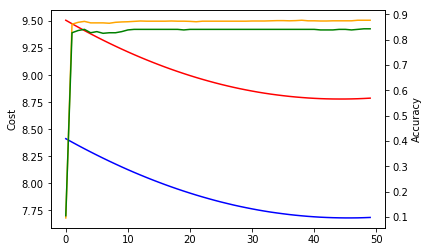

In [311]:
acc_and_cost = result['accuracy and cost']
train_cost = acc_and_cost['train_cost']
train_acc = acc_and_cost['train_acc']
test_cost = acc_and_cost['test_cost']
test_acc = acc_and_cost['test_acc']

fig = plt.figure()
 
ax1 = fig.add_subplot(111)
ax1.plot(range(len(train_cost)), train_cost, color='red')
ax1.plot(range(len(test_cost)), test_cost, color='blue')
ax1.set_ylabel('Cost')

ax2 = ax1.twinx()
ax2.plot(range(len(train_acc)), train_acc, color='orange')
ax2.plot(range(len(test_acc)), test_acc, color='green')
ax2.set_ylabel('Accuracy')

The predict value is 8, the real digit is 8


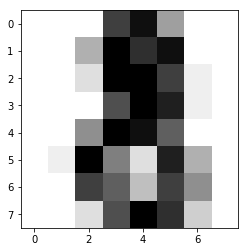

In [312]:
predict(X_test[99], y_test[99])

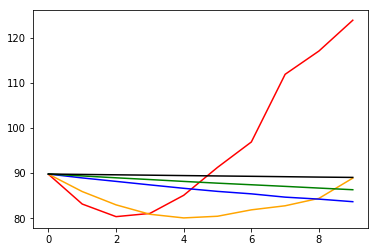

In [288]:
# learning rate graph1
lrs = [1e-5, 1e-5 / 2, 1e-6, 1e-6 / 2, 1e-7]
colors = ['red', 'orange', 'blue', 'green', 'black']
for lr, c in zip(lrs, colors):
    cost = digits_recognization(X_train, y_train_, X_test, y_test_, 1000, lr, False)[0]['cost']
    plt.plot(range(len(cost)), cost, color=c)

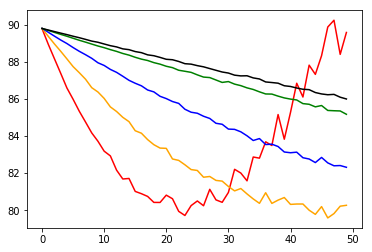

In [290]:
# increase the iteration times
# learning rate graph1
lrs = [1e-6, 1e-6 / 2, 1e-6 / 4, 1e-6 / 8, 1e-7]
colors = ['red', 'orange', 'blue', 'green', 'black']
for lr, c in zip(lrs, colors):
    cost = digits_recognization(X_train, y_train_, X_test, y_test_, 5000, lr, False)[0]['cost']
    plt.plot(range(len(cost)), cost, color=c)

> 1e-6 / 2 是比较不错的学习率

# Congratulations ! You have completed assigment 4. 